# 2.3 Additional exercises

This notebook contains a wealth of additional exercises and projects for you to pick from. Since there are quite a few and you only have 2 hours during the tutorial, just choose to solve the ones you like the most.

CNN can be used for a wide range of tasks that we have not all had the time to cover. These include

- [Transfer Learning](#Transfer-learning): Pre-trained CNNs (e.g., on ImageNet) can be fine-tuned for specific tasks with smaller datasets. Transfer learning helps leverage features learned from large datasets. We discussed this concept in notebook 2.2.

- [Object Detection](#Object-detection): CNNs can be employed for detecting and localizing objects within an image. Popular architectures include YOLO (You Only Look Once) use CNNs for object detection.

- [Semantic Segmentation](#Semantic-segmentation): CNNs can be used for segmenting images into different regions or classes. Semantic segmentation is thus a type of image segmentation: The objective is to assign a semantic label (e.g., person, car, tree) to every pixel in an image. U-Net is an example of architectures used for semantic segmentation.

- [Instance Segmentation](#Instance-segmentation): Similar to semantic segmentation but involves distinguishing between individual instances of objects. Instance segmentation thus extends object detection by providing a detailed pixel-level mask for each individual object instance. Mask R-CNN is a popular architecture for instance segmentation.

- [Image Captioning](#Image-captioning): CNNs can be combined with Recurrent Neural Networks (RNNs) to generate captions for images. The image features are extracted using a CNN, and an RNN generates a descriptive caption.

- Generative Models: CNNs are used in generative models like GANs (Generative Adversarial Networks) for generating realistic images. Conditional GANs allow controlling the characteristics of generated images.

- [Image Style Transfer](#Image-style-transfer): CNNs can be used for transferring the artistic style of one image to another. Neural Style Transfer uses CNNs to achieve this.

- Medical Image Analysis: CNNs are employed in tasks such as tumor detection, medical image segmentation, and disease classification. 3D CNNs are used for analyzing volumetric medical images.

- Video Analysis: CNNs can be extended to video data for tasks like action recognition and video classification. 3D CNNs or 2D CNNs applied to temporal sequences are common in video analysis.

- Human Pose Estimation: CNNs can be used to estimate the keypoints representing the human pose in images. Popular architectures include OpenPose and PoseNet.

- [Super-Resolution](#Super-resolution): CNNs can be used for enhancing the resolution of images. SRGAN (Super-Resolution Generative Adversarial Network) is an example.

- Face Recognition: CNNs are widely used for face recognition tasks. FaceNet and DeepFace are examples of architectures used for this purpose.

**N.B.: Note that when you run the notebook in Google Colab, you would need to mount your Google Drive for saving (from google.colab import drive, drive.mount('/content/gdrive')) and uploading the image. Also, some of the listed examples might not work out of the box (e.g. due to differences in the versions of different libraries).** Don't worry though. If you can discuss and understand the code, we will try to solve unforseen problems like these together during the tutorials.

## Building CNNs

**Exercise:** Create and train a neural network for image classification based on the data set FashionMNIST and the concepts you learned in notebook 2.1.

In [1]:
from torchvision.datasets import FashionMNIST

#[WRITE YOUR OWN CODE BELOW]


## Transfer learning

**Exercise**: Retrain a neural network following the steps in notebook 2.2. Choose a suitable neural network architecture and dataset yourself.

## Object detection

In [2]:
# Download the zip file
!wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip -P data

# Unzip the file in the data directory (suppressing output)
!unzip data/PennFudanPed.zip -d data >/dev/null 2>&1

--2024-03-15 13:36:33--  https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53723336 (51M) [application/zip]
Saving to: ‘data/PennFudanPed.zip’

PennFudanPed.zip    100%[===================>]  51.23M  13.4MB/s    in 4.5s    

2024-03-15 13:36:38 (11.3 MB/s) - ‘data/PennFudanPed.zip’ saved [53723336/53723336]



/home/andreas/.local/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


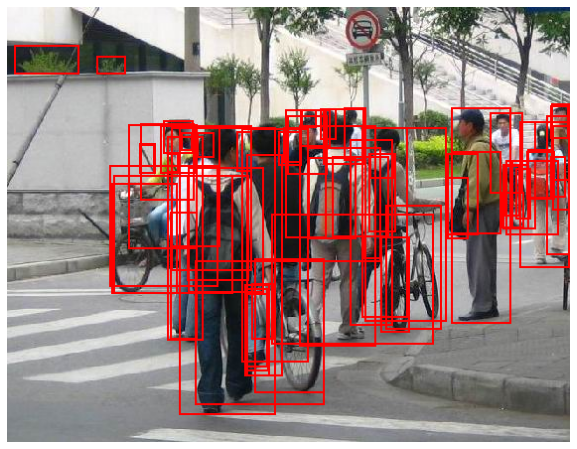

In [3]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Function to read an image and convert it to a PyTorch tensor without normalization
def read_image(image_path):
    return F.to_tensor(Image.open(image_path).convert("RGB"))

# Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True, progress=True)
model.eval()

# Example: Load an image
image_path = "data/PennFudanPed/PNGImages/FudanPed00046.png"
image = read_image(image_path)

# Make predictions on the image
with torch.no_grad():
    prediction = model([image])  # Send the image through the model
    boxes = prediction[0]['boxes'].tolist()  # Convert boxes to a list
    labels = prediction[0]['labels'].tolist()  # Convert labels to a list

# Convert to NumPy array for displaying with matplotlib
image_np = F.to_pil_image(image.mul(255).byte())

plt.figure(figsize=(16, 8))
# Draw bounding boxes manually using matplotlib
draw = ImageDraw.Draw(image_np)
for box, label in zip(boxes, labels):
    draw.rectangle(box, outline='red', width=2)

# Display the image with bounding boxes and labels
plt.imshow(image_np)
plt.axis('off')
plt.show()

That's quite a lot of boxes... what did the network detect? The Faster R-CNN model in torchvision for ResNet50 backbone is trained on the COCO dataset, so we can translate the labels into human-readable chategories.

In [4]:
# COCO class names
coco_classes = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
    'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

# Map numeric labels to COCO class names
class_names = [coco_classes[label - 1] for label in labels]  # Subtract 1 as COCO labels start from 1

# Print the list of class names
print("Detected Class Names:", class_names)

Detected Class Names: ['person', 'person', 'person', 'person', 'person', 'bicycle', 'person', 'handbag', 'handbag', 'bicycle', 'person', 'person', 'person', 'person', 'handbag', 'bicycle', 'handbag', 'person', 'bicycle', 'skis', 'person', 'person', 'person', 'person', 'skis', 'bicycle', 'fork', 'handbag', 'person', 'person', 'person', 'skis', 'bicycle', 'person', 'person', 'person', 'laptop', 'skis', 'skis', 'laptop', 'skis', 'person', 'person', 'toilet', 'bicycle', 'person', 'person', 'bicycle', 'person', 'person', 'bicycle', 'person', 'motorcycle', 'handbag', 'bicycle', 'bicycle', 'skis', 'person', 'person', 'person', 'handbag', 'skis', 'bicycle', 'person', 'snowboard', 'skis', 'person', 'bicycle', 'person', 'toilet', 'person', 'handbag']


Okay, so it found a lot of bicycles and people which is certainly correct. But also skis... At any rate, you are probably not interested in the COCO classes for scientific purposes and want to retrain the network to provide output based on another set of classes. 

**Exercise**: Have a look at [PyTorch's homepage](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html) to learn how to retrain a CNN for object detection. Warning: While you can run the code in Google Colab out of the box (and the Google Colab script is provided), training the networks will take hours. So, unless you are able to run the code on your own computer, limit yourself to discussing the content of the script.



## Semantic segmentation

**Exercise**: You can find a rudimentary example of semantic segmentation on [PyTorch's homepage](https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/). Here, you use a pretrained network from Deeplabv3. Run and discuss the code.

**Exercise**: When looking for external resources, Kaggle is a useful source. Have a look at one of the examples on their [homepage](https://www.kaggle.com/code/ligtfeather/semantic-segmentation-is-easy-with-pytorch). Note that this examples includes a training phase. Discuss the code.

## Instance segmentation

**Exercise**: You can find an example of semantic segemenation with object detection, i.e. instance segmentation, on [PyTorch's homepage](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_e2e.html). Discuss the code in your group. Find more resources on the topic.

## Image captioning

**Exercise**: You can find an example on how to do image captioning with CNN on [Kaggle](https://www.kaggle.com/code/mdteach/image-captioning-with-attention-pytorch). Discuss the code example.

## Image style transfer

**Exercise**: Explore the topic through the examples on [PyTorch's homepage](https://pytorch.org/tutorials/advanced/neural_style_tutorial.html) and [Kaggle](https://www.kaggle.com/code/parthplc/pytorch-project-1-neural-style-transfer). Running the example on PyTorch's homepage takes less than one minute. Give it a try with two other images. If you want to load the images from your google drive, you can change the code in the third block in the following way (what do the other changes do?):

In [ ]:
from PIL import ImageOps

# Mount Google Drive
drive.mount('/content/drive')

# Define the desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no GPU

# Define the loader to resize and transform images
loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor

# Function to load and preprocess images
def image_loader(image_name, target_size=None):
    image_path = f'/content/drive/My Drive/{image_name}'
    image = Image.open(image_path)
    # Resize the image to the target size if specified
    if target_size:
        image = transforms.Resize(target_size)(image)
    # Add a fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

# Load content image
content_img = image_loader("1200px-Matterhorn_suisse.jpg")

# Resize style image to match the size of content image
style_img = image_loader("Fons_Heijnsbroek.jpg", target_size=(content_img.size()[2], content_img.size()[3]))

# Convert style image to RGB if it's grayscale
if style_img.size()[1] == 1:  # Check if style image is grayscale
    style_img = style_img.expand(-1, 3, -1, -1)  # Convert grayscale to RGB

# If the aspect ratios differ, pad the style image to match the size of the content image
if style_img.size()[3] != content_img.size()[3]:
    target_width = content_img.size()[3]
    target_height = content_img.size()[2]
    pad_width = (target_width - style_img.size()[3]) // 2
    pad_height = (target_height - style_img.size()[2]) // 2
    style_img = F.pad(style_img, (pad_width, pad_width, pad_height, pad_height))

assert style_img.size() == content_img.size(), \
    "Style and content images must be of the same size"

## Super-resolution

**Exercise**: Explore the topic on [PyTorch's homepage](https://pytorch.org/tutorials/advanced/super_resolution_with_onnxruntime.html?highlight=onnx).